#1. What is Boosting in Machine Learning? Explain how it improves weak learners.

    ->Boosting is an iterative ensemble learning technique where multiple weak learners are trained sequentially, with each new model focusing on correcting the errors of the preceding ones, thereby reducing bias and improving accuracy.
    Weak learners, such as simple decision trees, become stronger when boosted by being trained.


#2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

    ->AdaBoost focuses on improving its ability to classify difficult examples, whereas
    Gradient Boosting focuses on minimizing the overall error in its predictions by iteratively fitting models to the new residuals.


#3.How does regularization help in XGBoost?

    ->Regularization in XGBoost helps prevent overfitting and improve the generalization capability of the model by controlling its complexity

#4.Why is CatBoost considered efficient for handling categorical data?

    ->CatBoost is considered efficient for handling categorical data primarily due to its innovative and automatic approach to processing these features.

#5.What are some real-world applications where boosting techniques are preferred over bagging methods?

    ->Boosting techniques are preferred over bagging methods for real-world applications like fraud detection and credit scoring.

#6.Write a Python program to:
    ● Train an AdaBoost Classifier on the Breast Cancer dataset
    ● Print the model accuracy


In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy:.4f}")

AdaBoost Classifier Accuracy on Breast Cancer Dataset: 0.9708


#7.Write a Python program to:
    ● Train a Gradient Boosting Regressor on the California Housing dataset
    ● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.7756


#8.Write a Python program to:
    ● Train an XGBoost Classifier on the Breast Cancer dataset
    ● Tune the learning rate using GridSearchCV
    ● Print the best parameters and accuracy

In [3]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with best parameters: {accuracy:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'learning_rate': 0.2}
Accuracy on the test set with best parameters: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
pip install catboost scikit-learn seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


#9.Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

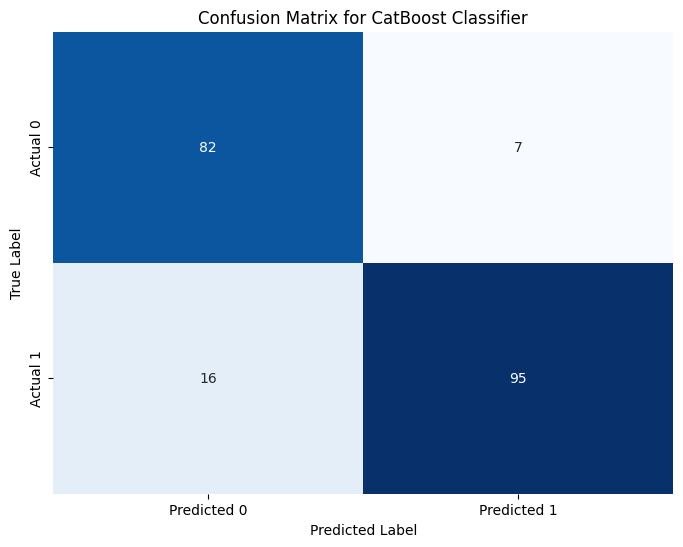

Accuracy of the CatBoost Classifier: 0.8850


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           random_seed=42,
                           verbose=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the CatBoost Classifier: {accuracy:.4f}")

#10.You're working for a FinTech company trying to predict loan default usingcustomer demographics and transaction behavior.
    The dataset is imbalanced, contains missing values, and has both numeric and
    categorical features.
    Describe your step-by-step data science pipeline using boosting techniques:
    ● Data preprocessing & handling missing/categorical values
    ● Choice between AdaBoost, XGBoost, or CatBoost
    ● Hyperparameter tuning strategy
    ● Evaluation metrics you'd choose and why
    ● How the business would benefit from your model

#10.To build a loan default prediction model with an imbalanced dataset, you should preprocess the data by handling missing values (e.g., imputation) and transforming categorical features (e.g., one-hot encoding)
    